In [1]:
import numpy as np
import matplotlib.pyplot as plt
import calculate_bispectrum as cb 
import os, sys
import h5py
import pandas as pd
# add path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import visualize_bispectrum as vb

In [6]:
seed = 0
redshifts = [20,15,10,5,1,0]
objs = {}
for z in [20, 15]:
    objs[z] = vb.BispectrumVariation_AS(seed, z)

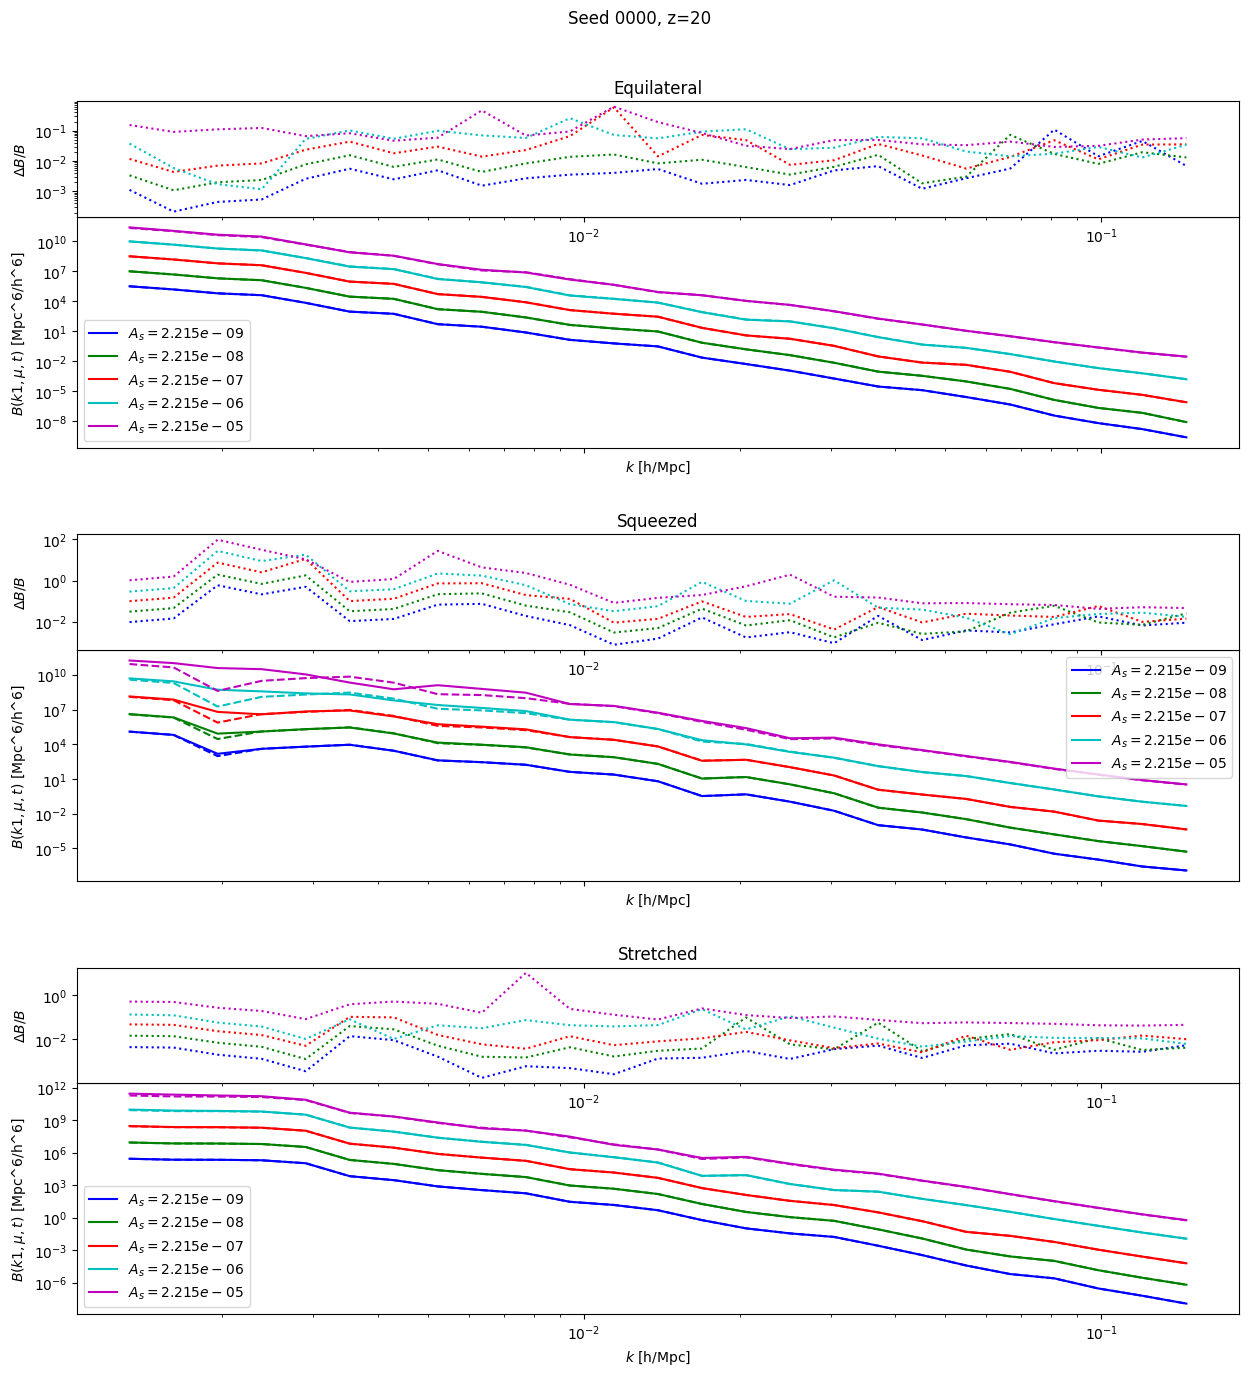

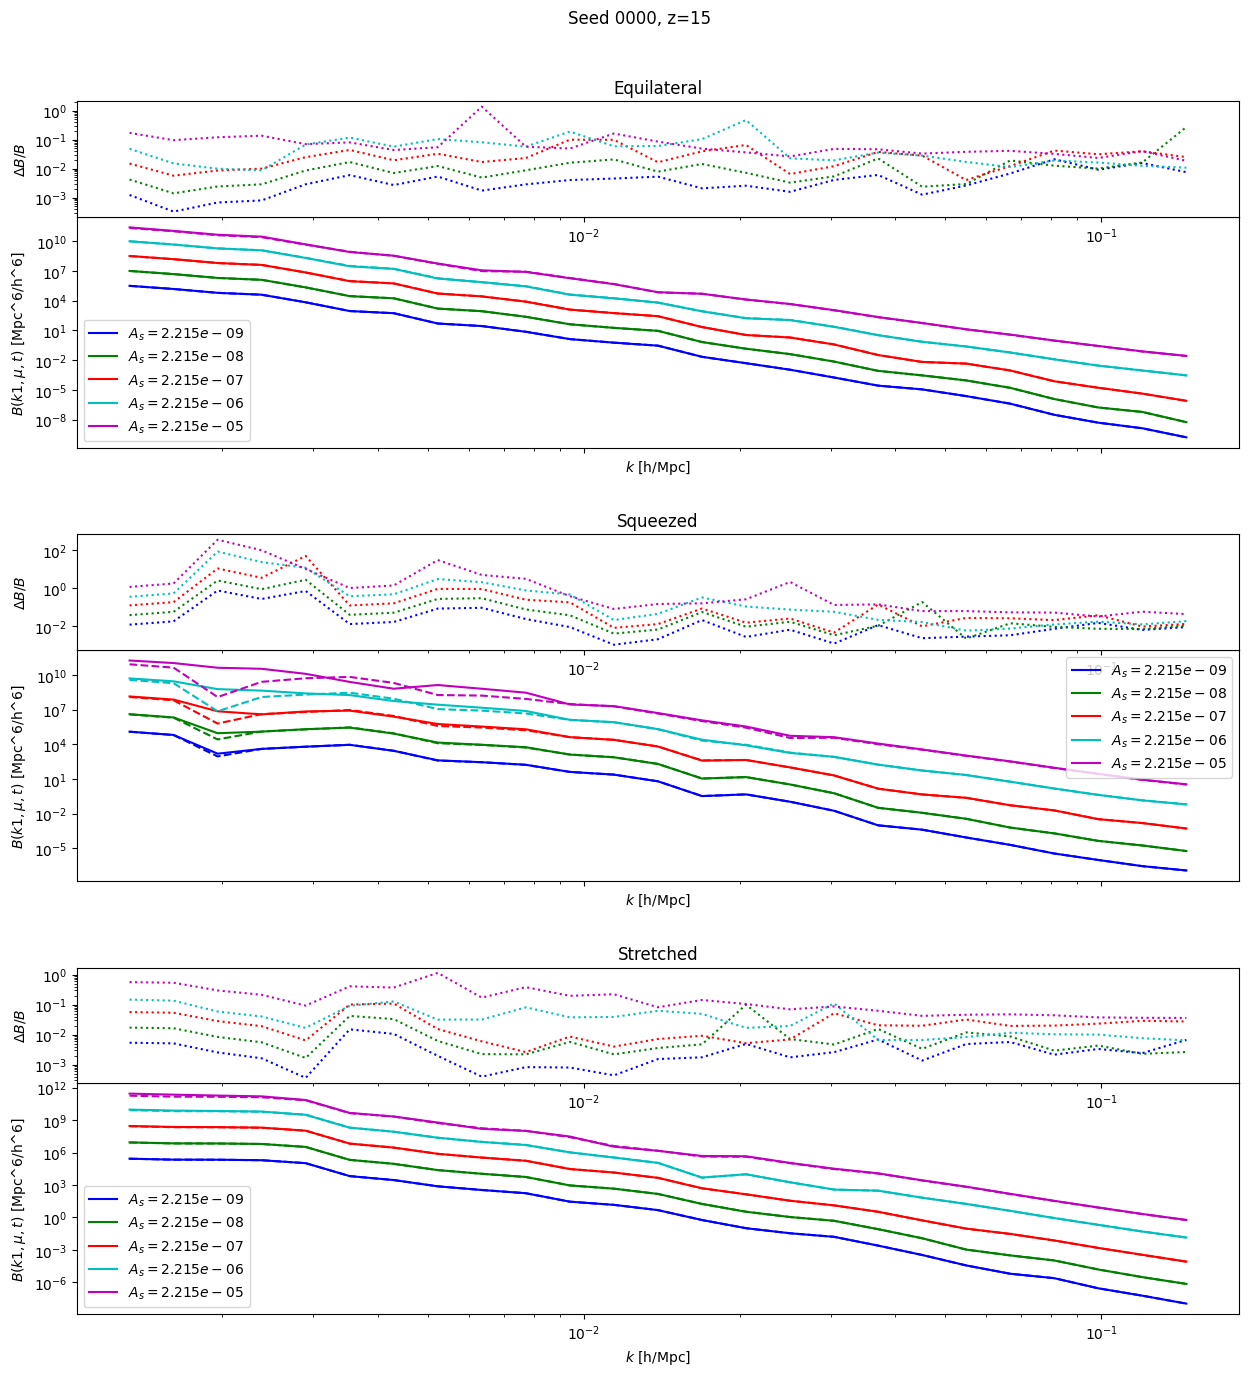

In [7]:
for obj in objs.values():
    obj.plot_bispectra_in_same_plot()